# Technique about DeepLearning

In [3]:
import numpy as np

### 1, SGD(stochastic gradient descent)

$$
W \leftarrow W - \eta \frac{\sigma L}{\sigma W}
$$

This mean to update the value on the left side with the value on the right side

In [4]:
class SGD:
    def __init__(self, lr=0.01): # lr: Learning rate
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 2, Momentum

$$
v \leftarrow \alpha v - \eta \frac{\sigma L}{\sigma W}
$$

$$
W \leftarrow W + v
$$

In [5]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9): # momentum: Deserves alpha in the above formula
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def __update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

### 3, AdaGrad

$$
h \leftarrow h + \frac{\sigma L}{\sigma W} \times \frac{\sigma L}{\sigma W}
$$

$$
W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\sigma L}{\sigma W}
$$

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

Another one, There is also a method called Adam \
It is a new method which combined AdaGrad and Momentum

### 4, Execute optimizer each other

In [1]:
import sys, os
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from collections import OrderedDict
from shared_code.optimizer import *

In [2]:
def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

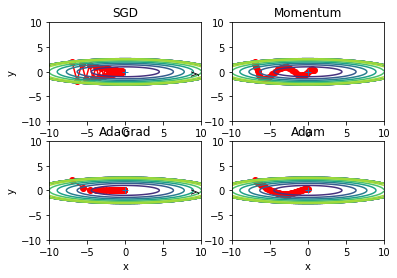

In [3]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

# Add a optimizers dictionary
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # for simple contour line
    mask = Z > 7
    Z[mask] = 0

    # plot
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color='red')
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    # colorbar()
    # sprint()
    plt.title(key)
    plt.xlabel('x')
    plt.ylabel('y')

plt.show()


### 5, Initial value of weight

#### 5-1, Weight init activation histogram

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from shared_code.functions import sigmoid

In [7]:
x = np.random.randn(1000, 100) # 1000 data

node_num = 100 # A number of hidden layer node
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]

    # w = np.random.randn(node_num, node_num) * 1 # gradient vanishing
    w = np.random.randn(node_num, node_num) * 0.01

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

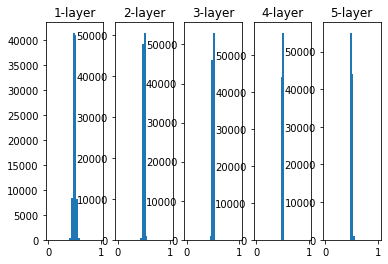

In [8]:
# draw a histogram
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

In [9]:
# initial value of Xavier

x = np.random.randn(1000, 100)

node_num = 100 # A number of hidden layer node
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]

    # w = np.random.randn(node_num, node_num) * 1 # gradient vanishing
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

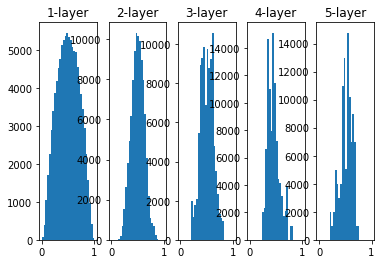

In [10]:
# draw a histogram
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

#### 5-2, Initial value of He

It is usually using ReLu activation functions.\
Comparison of other initial weight values.\
However, It is not executed in following the code.\
If you execute in this following the code, please enter this command in terminal
```python
python He.py
```

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from chapter3.dataset.mnist import load_mnist
from shared_code.util import smooth_curve
from shared_code.multi_layer_net import MultiLayerNet
from shared_code.optimizer import SGD

In [1]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# Experiment settings
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                                output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# Start training
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print(f"======= iteration: {str(i)} =======")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(f"{key} : {str(loss)}")

# Draw graph
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

NameError: name 'load_mnist' is not defined

### 6, Batch Normalization

This is normalization for each mini-batch. \
Make sure the mean value is 0 and the variance value is 1.
$$
\mu _B \leftarrow \frac{1}{m}\sum_{i=1}^m x_i \\
\sigma^2_B \leftarrow \frac{1}{m}\sum_{i=1}^{m} (x_i - \mu_B) \\
\hat{x_i} \leftarrow \frac{x_i - \mu_B}{\sqrt {\sigma^2_B + \epsilon}}
$$

#### reference
- $ \mu$: average
- $\sigma^2$: variance


#### 6-1, Batch norm test

In [3]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from chapter3.dataset.mnist import load_mnist
from shared_code.multi_layer_net_extend import MultiLayerNetExtend
from shared_code.optimizer import SGD, Adam

# Memo: In this following code should be executing in my house

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# delete train data
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                     weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print(f"epoch{epoch_cnt} | {train_acc} - {bn_train_acc}")

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

# draw graph
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print(f"========== {i+1}/16 ===========")
    train_acc_list, bn_train_acc_lsit = __train(w)

    plt.subplot(4, 4, i+1)
    plt.title(f"W:{w}")

    if i == 15:
        plt.plot(x, bn_train_acc_lsit, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_lsit, markevery=2)
        plt.plot(x, train_acc_list, linestyle='--', markevery=2)

    plt.ylim(0, 1.0)
    if i % 4: 
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc="lower right")

plt.show()

========== 1/16 ===========


TypeError: 'tuple' object is not callable

#### 6-2, Overfitting

There are tow cause of overfitting

- Too much parameter and Expressive model
- Too low training data

In [4]:
# Overfitting
import os, sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from chapter3.dataset.mnist import load_mnist
from shared_code.multi_layer_net import MultiLayerNet
from shared_code.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.0
# weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                         weight_decay_lambda=weight_decay_lambda)

optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(100000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(f"epoch: {epoch_cnt}, train acc: {train_acc} test acc: {test_acc}")

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# draw graph
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

dx = [[ 6.01761173e-05  9.18403256e-04  1.30916176e-03 ...  2.85700595e-04
  -9.01494131e-04  2.48488483e-07]
 [-3.86410147e-04  6.02340206e-04  8.83977723e-04 ...  1.85120265e-04
  -3.20458157e-04  7.39042254e-04]
 [ 3.55912773e-04  4.94944993e-04  1.30797795e-03 ... -1.40657842e-03
   6.06463855e-04 -2.17704489e-03]
 ...
 [-1.37424399e-05  9.35141354e-04  1.06461209e-03 ...  4.94850647e-04
  -1.03620844e-03  5.37041654e-05]
 [ 2.98145892e-03 -1.55804490e-03 -1.43969122e-03 ...  5.78024956e-04
  -1.07094400e-03 -1.76727004e-03]
 [-8.81432967e-04  8.21458230e-04 -1.55858405e-04 ...  5.43066237e-04
   7.05400730e-04  7.99353982e-04]]
dW = [[-7.15079025e-04 -6.84479669e-04  6.67835237e-04  2.88694725e-03
  -1.50805527e-03  2.03124184e-03 -4.11459795e-03  3.45478920e-04
   1.95989080e-03 -8.69182132e-04]
 [-8.82405111e-03  2.13953099e-03  1.34257823e-03  2.19690470e-03
  -6.15832622e-04  1.71458552e-03  9.82583055e-04 -6.46942086e-04
   1.28914726e-03  4.21496054e-04]
 [-3.76443633e-03  4

KeyboardInterrupt: 

#### 6-3 weight decay
Penalize having a large weight

Add to the loss function $\frac{1}{2} \lambda W^2$ for all weights

In [5]:
import os, sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from chapter3.dataset.mnist import load_mnist
from shared_code.multi_layer_net import MultiLayerNet
from shared_code.optimizer import SGD

In [ ]:
# Overfitting
import os, sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from chapter3.dataset.mnist import load_mnist
from shared_code.multi_layer_net import MultiLayerNet
from shared_code.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                         weight_decay_lambda=weight_decay_lambda)

optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(100000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(f"epoch: {epoch_cnt}, train acc: {train_acc} test acc: {test_acc}")

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# draw graph
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 7 Dropout

When neural network is become complicated, it is used this method

Dropout method is learning while randomly erasing neurons

In [ ]:
import os, sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from chapter3.dataset.mnist import load_mnist
from shared_code.multi_layer_net_extend import MultiLayerNetExtend
from shared_code.trainer import Trainer